In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv('dataset/SydneyHousePrices.csv')
df1.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [3]:
df1.shape

(199504, 9)

In [4]:
df1.groupby('suburb')['suburb'].agg('count')

suburb
Abbotsbury     125
Abbotsford     236
Agnes Banks     47
Airds           31
Alexandria     760
              ... 
Yarrawarrah     65
Yellow Rock     51
Yennora         32
Yowie Bay      214
Zetland        134
Name: suburb, Length: 685, dtype: int64

In [5]:
df1.isnull().sum()

Date              0
Id                0
suburb            0
postalCode        0
sellPrice         0
bed             154
bath              0
car           18151
propType          0
dtype: int64

In [6]:
df1['propType'].unique()

array(['house', 'townhouse', 'duplex/semi-detached', 'villa', 'other',
       'terrace', 'warehouse', 'acreage'], dtype=object)

In [7]:
df1.suburb = df1.suburb.apply(lambda x: x.strip())
suburb_stats = df1.groupby('suburb')['suburb'].agg('count').sort_values(ascending=False)
suburb_stats

suburb
Castle Hill         1250
Ermington           1248
Strathfield         1248
Carlingford         1247
Auburn              1244
                    ... 
Magenta                1
Glenmore               1
Bannockburn            1
Balmoral Village       1
Mount Helen            1
Name: suburb, Length: 685, dtype: int64

In [8]:
suburb_stats.values.sum()

199504

In [9]:
len(suburb_stats[suburb_stats>10])

608

In [10]:
suburb_stats_less_than_10 = suburb_stats[suburb_stats<=10]
suburb_stats_less_than_10

suburb
Waterfall           10
Claymore            10
Warwick Farm        10
Wentworth Point     10
Kirkham             10
                    ..
Magenta              1
Glenmore             1
Bannockburn          1
Balmoral Village     1
Mount Helen          1
Name: suburb, Length: 77, dtype: int64

In [11]:
len(df1.suburb.unique())

685

In [12]:
df1.suburb = df1.suburb.apply(lambda x: 'other' if x in suburb_stats_less_than_10 else x)
len(df1.suburb.unique())

609


## Outlier Removal Using Standard Deviation and Mean

In [13]:
df1.sellPrice.describe()

count    1.995040e+05
mean     1.269776e+06
std      6.948239e+06
min      1.000000e+00
25%      7.200000e+05
50%      9.850000e+05
75%      1.475000e+06
max      2.147484e+09
Name: sellPrice, dtype: float64

In [14]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('suburb'):
        m = np.mean(subdf.sellPrice)
        st = np.std(subdf.sellPrice)
        reduced_df = subdf[(subdf.sellPrice>(m-st)) & (subdf.sellPrice<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df2 = remove_pps_outliers(df1)
df2.shape

(155252, 9)

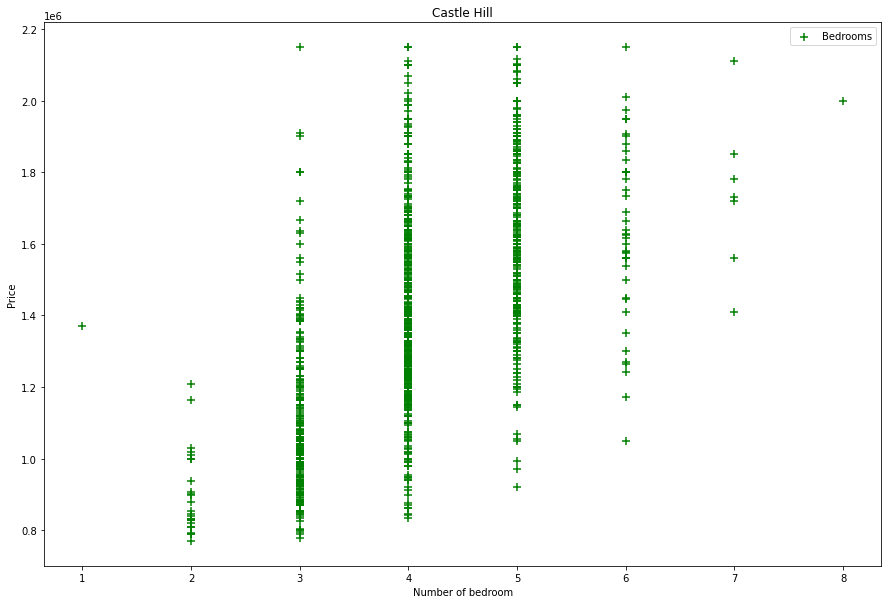

In [15]:

def plot_scatter_chart(df, suburb):

    bed_rooms = df[(df.suburb==suburb) & (df.bed > 0)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bed_rooms.bed, bed_rooms.sellPrice, marker='+', color='green',label='Bedrooms', s=50)
    plt.xlabel("Number of bedroom")
    plt.ylabel("Price")
    plt.title(suburb)
    plt.legend()
    
plot_scatter_chart(df2,"Castle Hill")

Text(0, 0.5, 'Price')

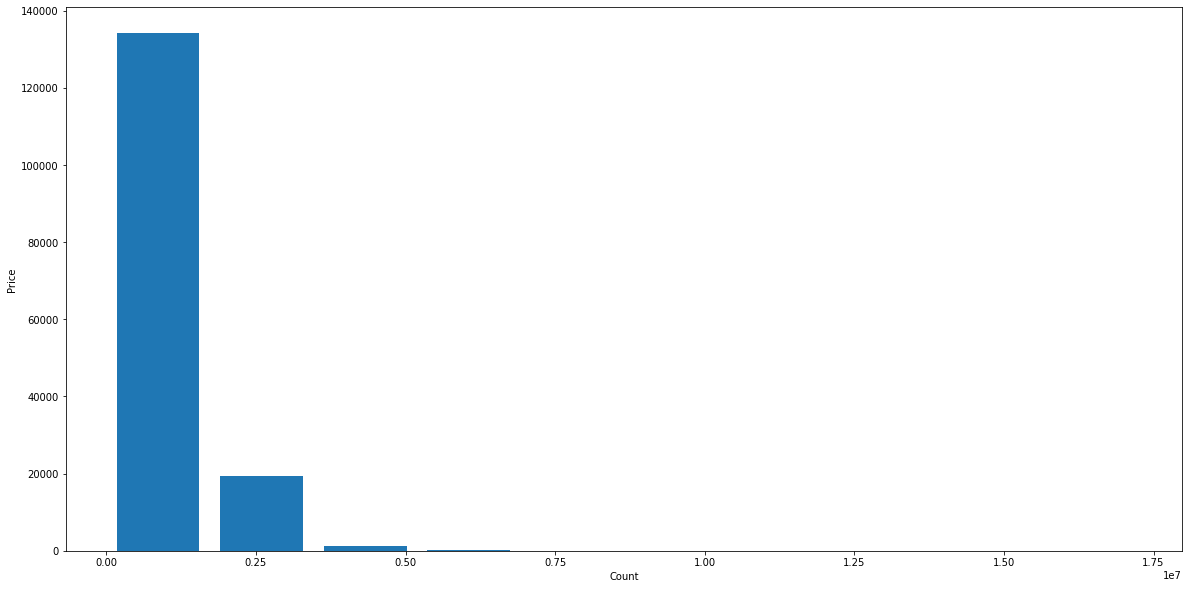

In [16]:

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.sellPrice,rwidth=0.8)
plt.xlabel("Count")
plt.ylabel("Price")

In [17]:
df2.bath.unique()

array([ 2,  3,  1,  4,  5,  7,  6,  8, 15, 10, 20, 11,  9, 12])

Text(0, 0.5, 'Count')

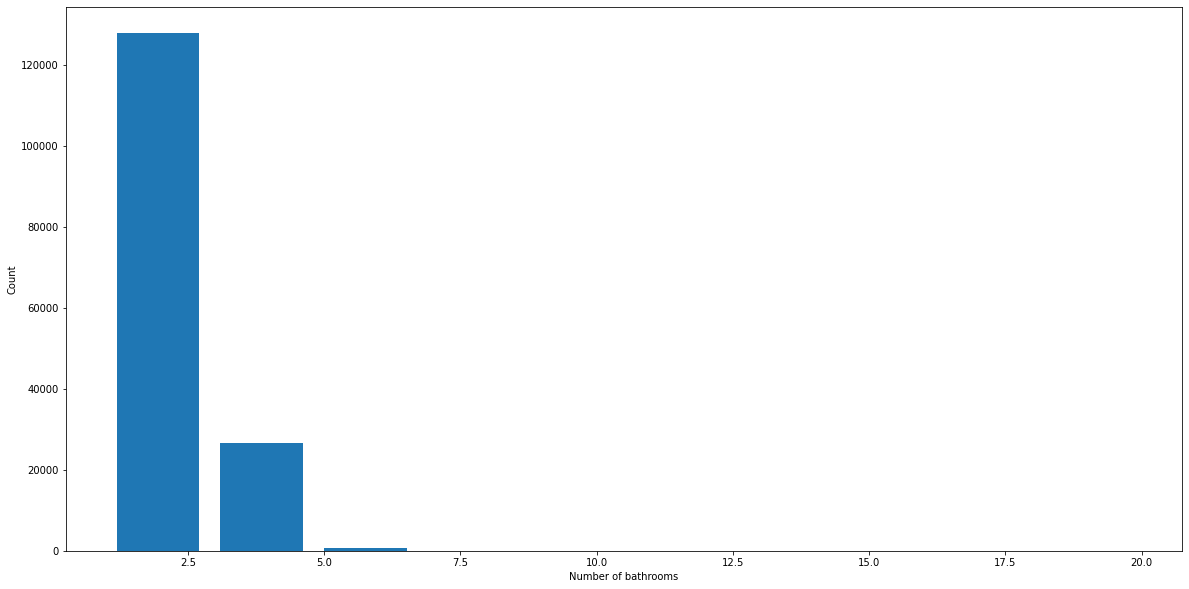

In [18]:
plt.hist(df2.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [19]:
df2[df2.bath>10]

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
23285,2010-05-10,170697,Burwood,2134,2750000,21.0,15,6.0,house
31923,2014-04-30,28317,Chatswood,2067,2600000,30.0,20,20.0,house
71082,2013-11-28,152091,Homebush West,2140,2110000,20.0,20,10.0,house
109775,2016-07-01,129982,Paddington,2021,2550000,11.0,11,NaN,terrace
139106,2018-05-31,77856,Sylvania,2224,2370000,16.0,12,9.0,house


## Use one hot encoding for suburb

In [20]:
dummies = pd.get_dummies(df2.suburb)
dummies.head()

,Abbotsbury,Abbotsford,Agnes Banks,Airds,Alexandria,Alfords Point,Allambie Heights,Allawah,Ambarvale,Annandale,...,Woronora Heights,Yagoona,Yanderra,Yarramundi,Yarrawarrah,Yellow Rock,Yennora,Yowie Bay,Zetland,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df3 = pd.concat([df2,dummies.drop('other',axis='columns')],axis='columns')
df3.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType,Abbotsbury,...,Woronora,Woronora Heights,Yagoona,Yanderra,Yarramundi,Yarrawarrah,Yellow Rock,Yennora,Yowie Bay,Zetland
0,2019-07-04,38561,Abbotsbury,2176,838000,4.0,2,3.0,house,1,...,0,0,0,0,0,0,0,0,0,0
1,2019-06-05,38571,Abbotsbury,2176,930000,5.0,3,3.0,house,1,...,0,0,0,0,0,0,0,0,0,0
2,2019-05-01,38594,Abbotsbury,2176,830000,3.0,1,2.0,house,1,...,0,0,0,0,0,0,0,0,0,0
3,2019-04-06,38601,Abbotsbury,2176,915000,4.0,3,2.0,house,1,...,0,0,0,0,0,0,0,0,0,0
4,2019-04-06,38602,Abbotsbury,2176,867000,4.0,2,5.0,house,1,...,0,0,0,0,0,0,0,0,0,0


## Replace PropType to Number

In [36]:
df4 = df3.replace(['house', 'townhouse', 'duplex/semi-detached', 'villa', 'other',
  'terrace', 'warehouse', 'acreage'],[0,1,2,3,4,5,6,7])
df4.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType,Abbotsbury,...,Woronora,Woronora Heights,Yagoona,Yanderra,Yarramundi,Yarrawarrah,Yellow Rock,Yennora,Yowie Bay,Zetland
0,2019-07-04,38561,Abbotsbury,2176,838000,4.0,2,3.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2019-06-05,38571,Abbotsbury,2176,930000,5.0,3,3.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2019-05-01,38594,Abbotsbury,2176,830000,3.0,1,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2019-04-06,38601,Abbotsbury,2176,915000,4.0,3,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2019-04-06,38602,Abbotsbury,2176,867000,4.0,2,5.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df5 = df4.drop(['Id','postalCode','suburb','Date','car'],axis='columns')
df5.isnull().sum()

sellPrice       0
bed            89
bath            0
propType        0
Abbotsbury      0
               ..
Yarrawarrah     0
Yellow Rock     0
Yennora         0
Yowie Bay       0
Zetland         0
Length: 612, dtype: int64

In [40]:
df6 = df5.dropna()
df6.isnull().sum()

sellPrice      0
bed            0
bath           0
propType       0
Abbotsbury     0
              ..
Yarrawarrah    0
Yellow Rock    0
Yennora        0
Yowie Bay      0
Zetland        0
Length: 612, dtype: int64

## Build a model

In [41]:
X = df6.drop(['sellPrice'],axis='columns')
X.head()

,bed,bath,propType,Abbotsbury,Abbotsford,Agnes Banks,Airds,Alexandria,Alfords Point,Allambie Heights,...,Woronora,Woronora Heights,Yagoona,Yanderra,Yarramundi,Yarrawarrah,Yellow Rock,Yennora,Yowie Bay,Zetland
0,4.0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y = df6.sellPrice
y.head()

0    838000
1    930000
2    830000
3    915000
4    867000
Name: sellPrice, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [62]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7089829006389572

## Use K Fold cross validation to measure accuracy LinearRegression model

In [28]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.69890652, 0.70020347, 0.70123238, 0.713521  , 0.70629243])

## Testing the model 

In [49]:
def predict_price(suburb,bed,bath,prop_type):    
    loc_index = np.where(X.columns==suburb)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bed
    x[1] = bath
    x[2] = prop_type
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [59]:
predict_price('Castle Hill',4,2,0)

1357127.0482585644

In [60]:
predict_price('Castle Hill',4,2,0)

1357127.0482585644

In [51]:
predict_price('Auburn', 4, 2, 0)

829906.3078350514

## Export the model

In [63]:
import pickle
with open('sydney_house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [64]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))